# Training Hybrid Models

## Checking GPU Availability
First, let's see if we have a GPU available. It is highly recommended to utilize a GPU, although it is also possible to run this experiment on the CPU at a much slower rate.

In [10]:
from experiment import *
from data_utils import load_hybrid_data

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Current device: " + str(device))

Current device: cuda


## Loading Training Data
Here, we define the paths to the images and their corresponding masks (targets).
The values for normalization are pre-computed from the training data in order to save time.
In case you want to reproduce all results from the paper, you need to run this notebook several times with different amount of training data. Remember that the actual number is 10-fold higher than what the start/stop inidices suggest, since we have every sample in 10 versions with different SNRs.

Because we wanted to compare the effect of using an increasing number of samples for training, we kept the validation data always the same for a fair and meaningful comparison of the results. Notice, (contrary to the training data) we don't apply any augmentation.

In [15]:
train_dir = os.path.join(os.getcwd(), 'data', 'hybrid', 'train', 'fistanet')
mask_dir = os.path.join(os.getcwd(), 'data', 'masks', 'train')

print(train_dir)

# hybrid
normalizer = {
        'norm_mean': [101],
        'norm_std': [26],
        }

start = 0
#stop = 1000
#stop = 2000
#stop = 4000
stop = 8000
train_dataset = load_hybrid_data(train_dir, mask_dir, start, stop, normalizer, augment=True)

# this subset is always reserved as the validation set, regardless of the number of training samples
start = 8000
stop = 9000
val_dataset = load_hybrid_data(train_dir, mask_dir, start, stop, normalizer)

print('Number of training samples: ' + str(len(train_dataset)))
print('Number of validation samples: ' + str(len(val_dataset)))

C:\Users\galiger.gergo\Desktop\ThermUNet-master\data\hybrid\train\fistanet
Number of training samples: 80000
Number of validation samples: 10000


## Creating the Architecture
Here, we create the actual architecture of our network, and set it up to be used in the previously determined device (cpu or cuda).

In [16]:
# this will give create the compact architecture...
# model = get_cmp_thermunet().to(torch.device(device))

# ...or you could use the more complex architecture
model = get_lrg_thermunet().to(torch.device(device))

## Inspecting the Architecture
We can have a look at the architecture and check for instance, if the number of parameters is what we expect.


In [17]:
from torchsummary import summary

device = torch.device('cuda' if next(model.parameters()).is_cuda else 'cpu')

summary(model, input_size=(1, 64, 256), device=str(device))

Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─UNetConvBlock: 2-1                --
|    |    └─Sequential: 3-1              2,480
|    └─UNetConvBlock: 2-2                --
|    |    └─Sequential: 3-2              13,888
|    └─UNetConvBlock: 2-3                --
|    |    └─Sequential: 3-3              55,424
|    └─UNetConvBlock: 2-4                --
|    |    └─Sequential: 3-4              221,440
|    └─UNetConvBlock: 2-5                --
|    |    └─Sequential: 3-5              885,248
├─ModuleList: 1-2                        --
|    └─UNetUpBlock: 2-6                  --
|    |    └─Sequential: 3-6              32,896
|    |    └─UNetConvBlock: 3-7           442,624
|    └─UNetUpBlock: 2-7                  --
|    |    └─Sequential: 3-8              8,256
|    |    └─UNetConvBlock: 3-9           110,720
|    └─UNetUpBlock: 2-8                  --
|    |    └─Sequential: 3-10             2,080
|    |    └─UNetConvBlock: 3-1

Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─UNetConvBlock: 2-1                --
|    |    └─Sequential: 3-1              2,480
|    └─UNetConvBlock: 2-2                --
|    |    └─Sequential: 3-2              13,888
|    └─UNetConvBlock: 2-3                --
|    |    └─Sequential: 3-3              55,424
|    └─UNetConvBlock: 2-4                --
|    |    └─Sequential: 3-4              221,440
|    └─UNetConvBlock: 2-5                --
|    |    └─Sequential: 3-5              885,248
├─ModuleList: 1-2                        --
|    └─UNetUpBlock: 2-6                  --
|    |    └─Sequential: 3-6              32,896
|    |    └─UNetConvBlock: 3-7           442,624
|    └─UNetUpBlock: 2-7                  --
|    |    └─Sequential: 3-8              8,256
|    |    └─UNetConvBlock: 3-9           110,720
|    └─UNetUpBlock: 2-8                  --
|    |    └─Sequential: 3-10             2,080
|    |    └─UNetConvBlock: 3-1

## Training
Finally, we can start the training procedure.
The folder names to store the results are automatically generated and based on a timestamp.
They are always a subfolder of the training data folder.

In case you want to observe some random output samples during training, you can set the visualization_lvl to either 1 (plot validation data output samples) or 2 (plot validation and training data output samples).

Successfully created the directory C:\Users\galiger.gergo\Desktop\ThermUNet-master\data\hybrid\train\fistanet\2022-12-25_3-3-54.349477\models 
epoch  0


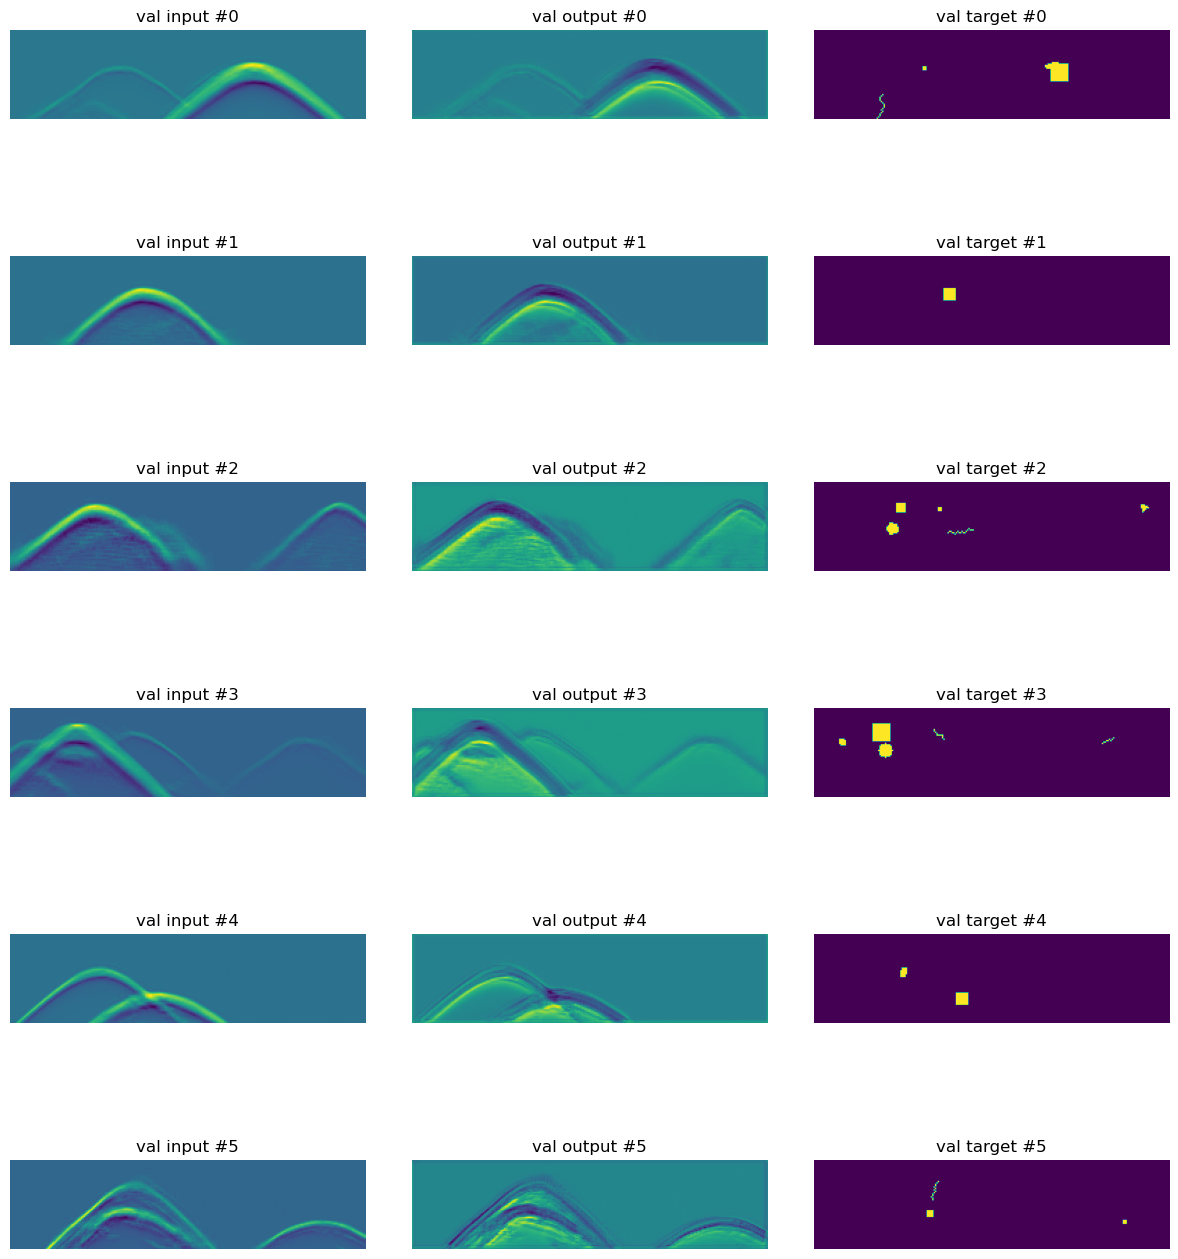

======================= epoch 0==========================
train loss: 0.01248279145019478
val loss: 0.6024774792790413
best val loss so far: 0.6024774792790413 (epoch 0)
======================= epoch 1==========================
train loss: 0.01006951749115251
val loss: 0.010519661669619382
best val loss so far: 0.010519661669619382 (epoch 1)
======================= epoch 2==========================
train loss: 0.009664828628941904
val loss: 0.009895225767744705
best val loss so far: 0.009895225767744705 (epoch 2)
======================= epoch 3==========================
train loss: 0.009416746844595763
val loss: 0.009633582989452407
best val loss so far: 0.009633582989452407 (epoch 3)
======================= epoch 4==========================
train loss: 0.009250740054587368
val loss: 0.00939063975494355
best val loss so far: 0.00939063975494355 (epoch 4)
epoch  5


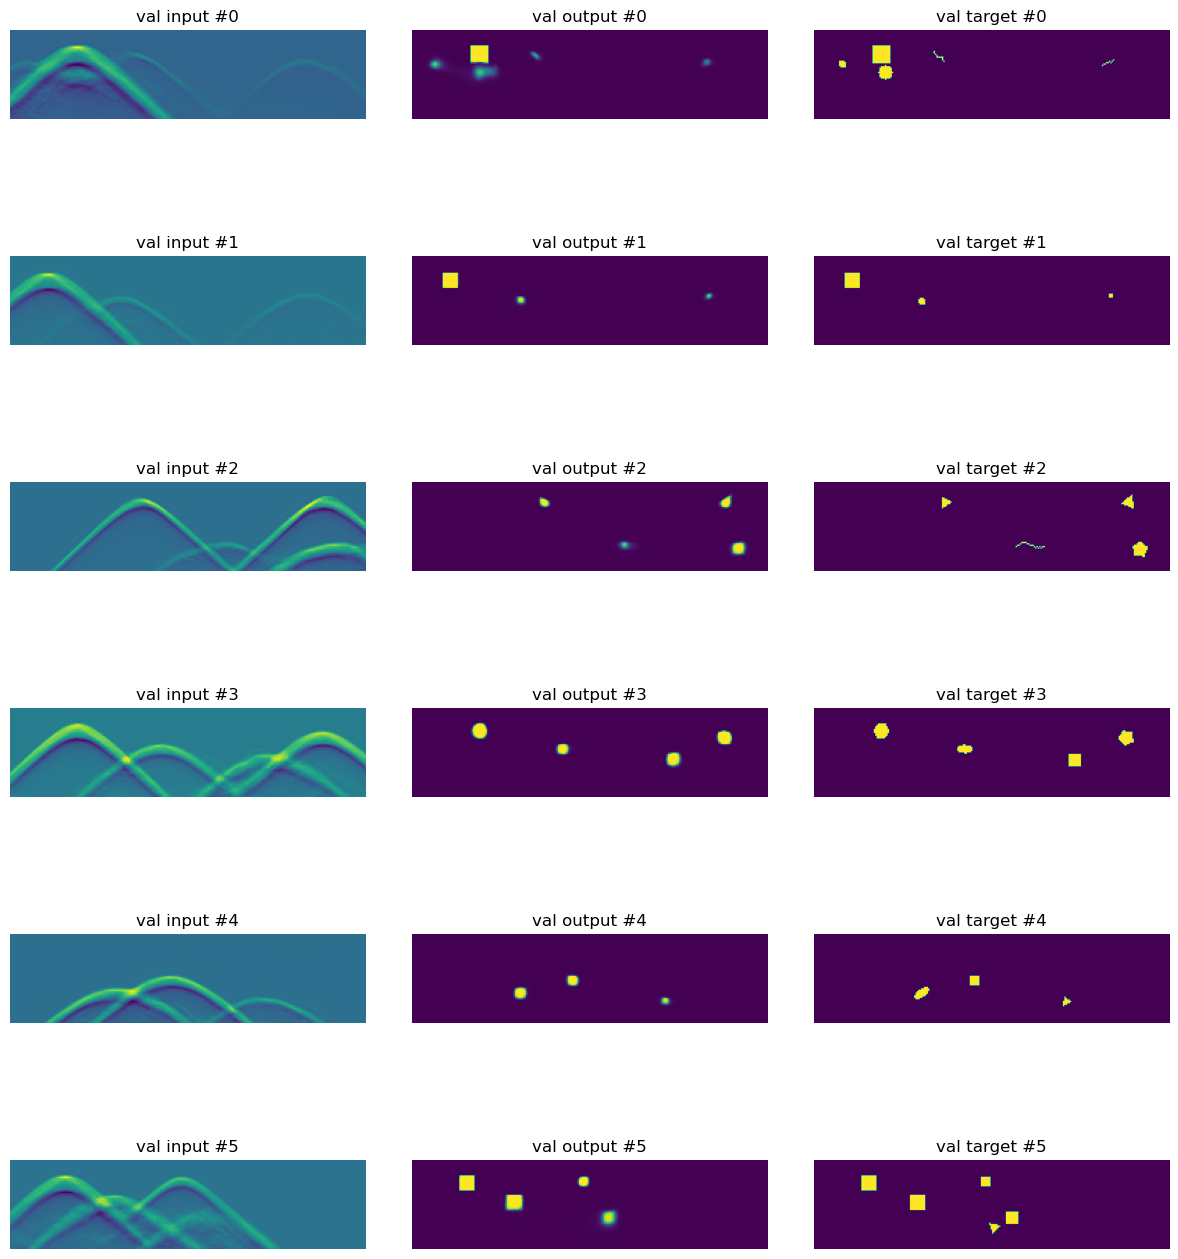

======================= epoch 5==========================
train loss: 0.009112103309220401
val loss: 0.009395577953313477
best val loss so far: 0.00939063975494355 (epoch 4)
======================= epoch 6==========================
train loss: 0.00900034699983371
val loss: 0.009525399592239409
best val loss so far: 0.00939063975494355 (epoch 4)
======================= epoch 7==========================
train loss: 0.008914148003357696
val loss: 0.009335409943712875
best val loss so far: 0.009335409943712875 (epoch 7)
======================= epoch 8==========================
train loss: 0.008830727655615192
val loss: 0.009133511141175403
best val loss so far: 0.009133511141175403 (epoch 8)
======================= epoch 9==========================
train loss: 0.008760605923074764
val loss: 0.009206742186797783
best val loss so far: 0.009133511141175403 (epoch 8)
epoch  10


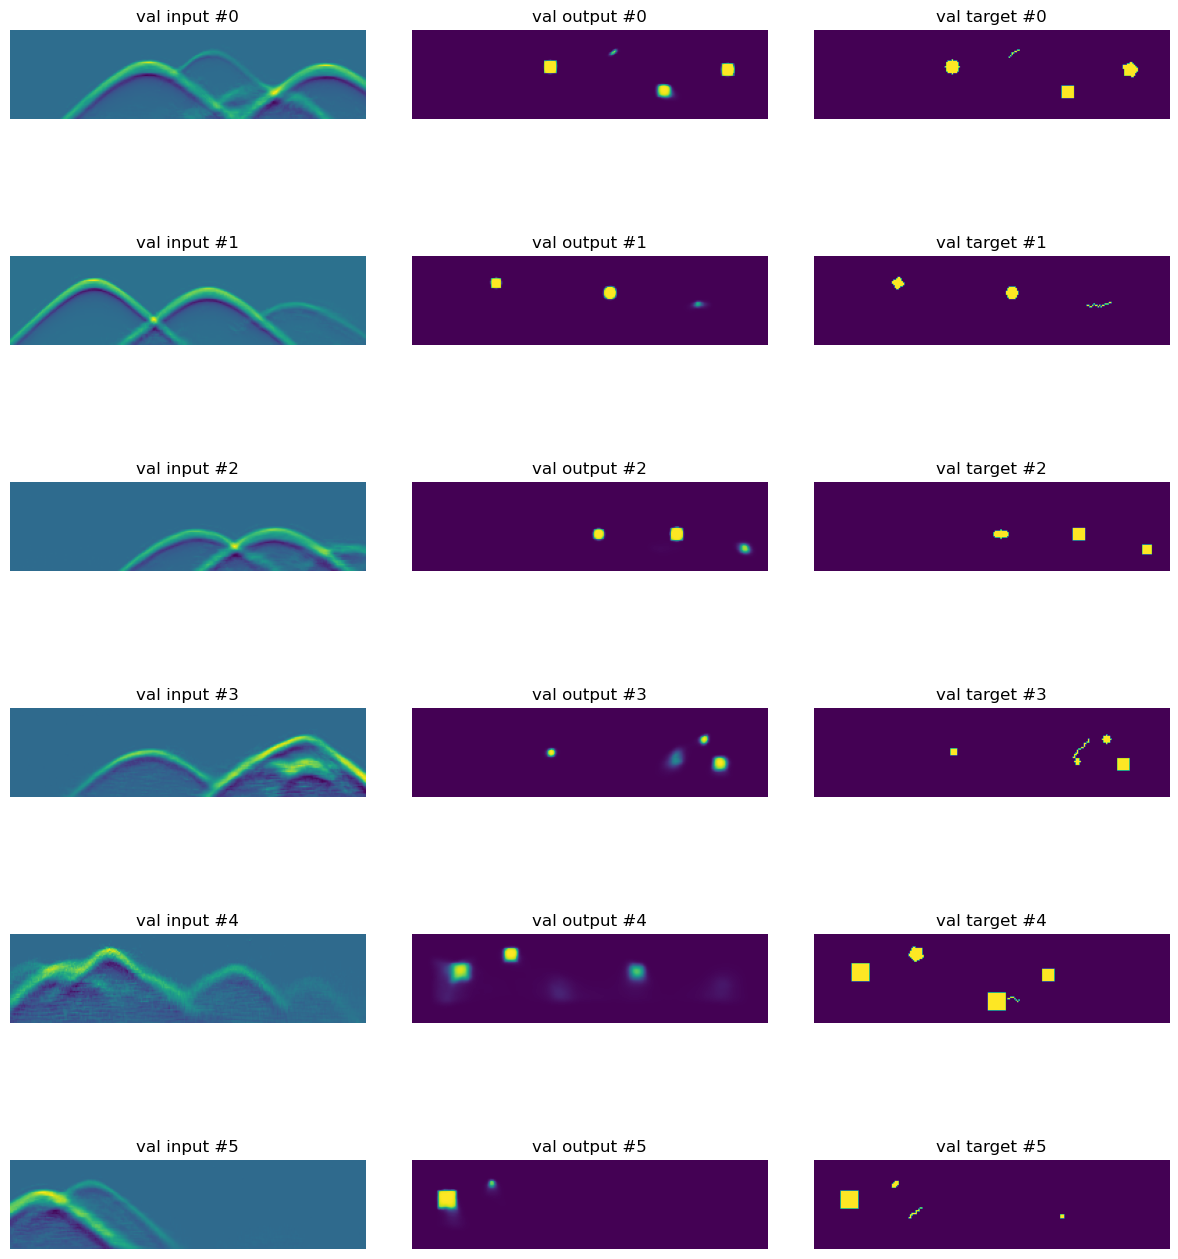

======================= epoch 10==========================
train loss: 0.008699319573745016
val loss: 0.009092127251671626
best val loss so far: 0.009092127251671626 (epoch 10)
======================= epoch 11==========================
train loss: 0.0086433464531583
val loss: 0.009220643966458738
best val loss so far: 0.009092127251671626 (epoch 10)
======================= epoch 12==========================
train loss: 0.008586817348463229
val loss: 0.00898781452490948
best val loss so far: 0.00898781452490948 (epoch 12)
======================= epoch 13==========================
train loss: 0.008543732495512813
val loss: 0.009102653575595468
best val loss so far: 0.00898781452490948 (epoch 12)
======================= epoch 14==========================
train loss: 0.008500232334015891
val loss: 0.00915117795811966
best val loss so far: 0.00898781452490948 (epoch 12)
epoch  15


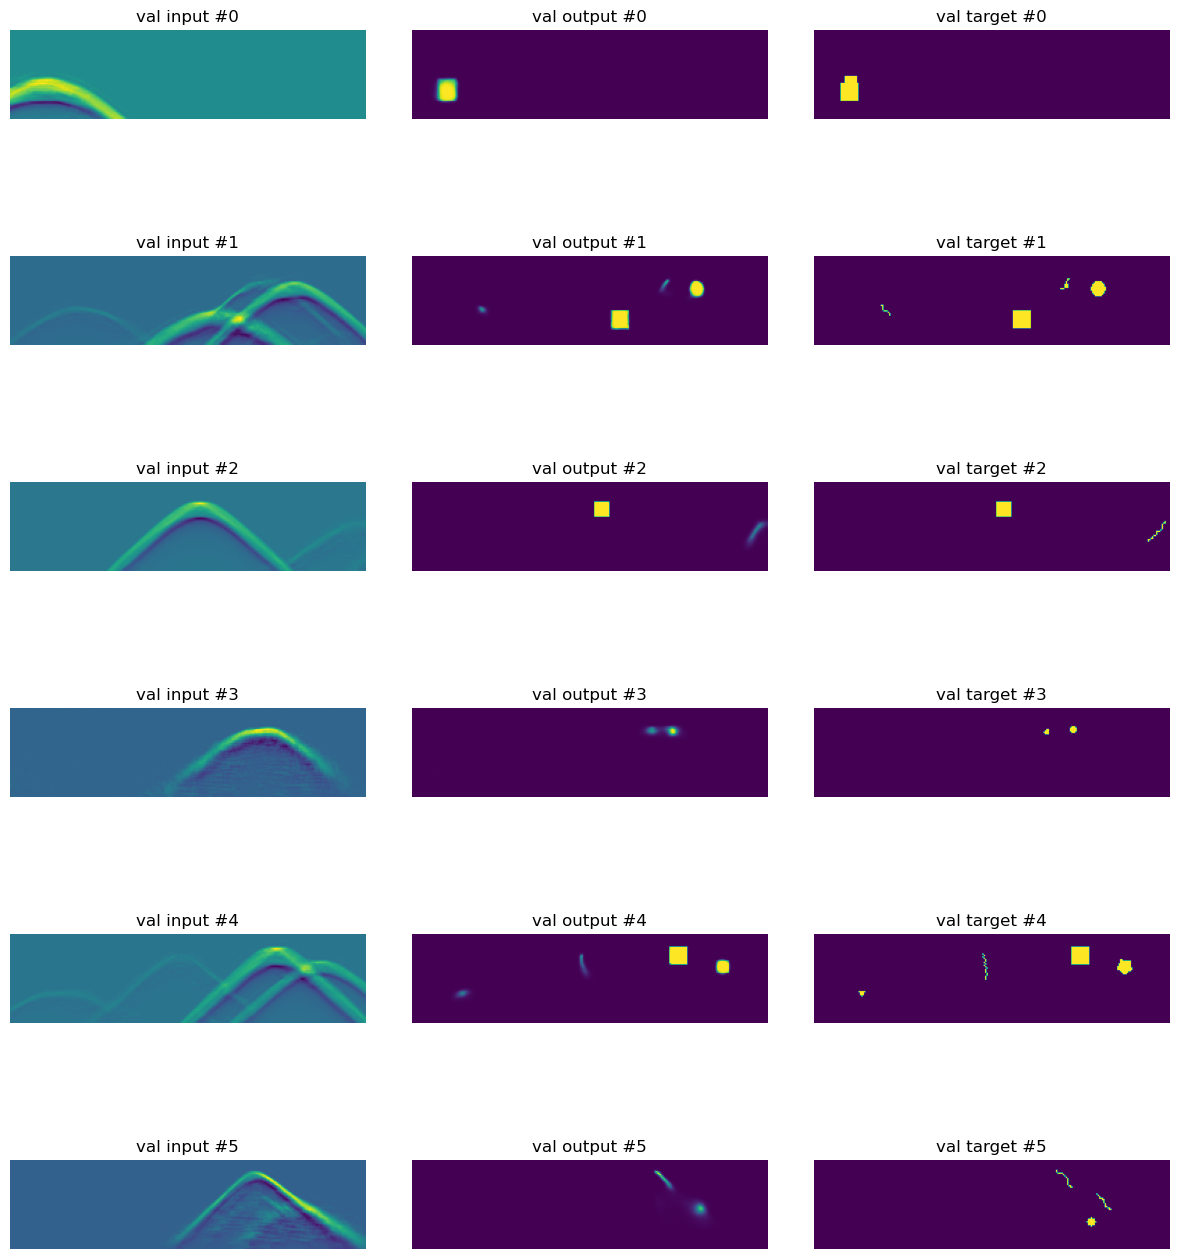

======================= epoch 15==========================
train loss: 0.008457581916183699
val loss: 0.009024994468549267
best val loss so far: 0.00898781452490948 (epoch 12)
======================= epoch 16==========================
train loss: 0.008418520993756829
val loss: 0.009042964976746589
best val loss so far: 0.00898781452490948 (epoch 12)
======================= epoch 17==========================
train loss: 0.008368439915815543
val loss: 0.009048792958259583
best val loss so far: 0.00898781452490948 (epoch 12)
======================= epoch 18==========================
train loss: 0.008335311903763794
val loss: 0.009007737875450403
best val loss so far: 0.00898781452490948 (epoch 12)
======================= epoch 19==========================
train loss: 0.008303360234363935
val loss: 0.009057952431263403
best val loss so far: 0.00898781452490948 (epoch 12)
epoch  20


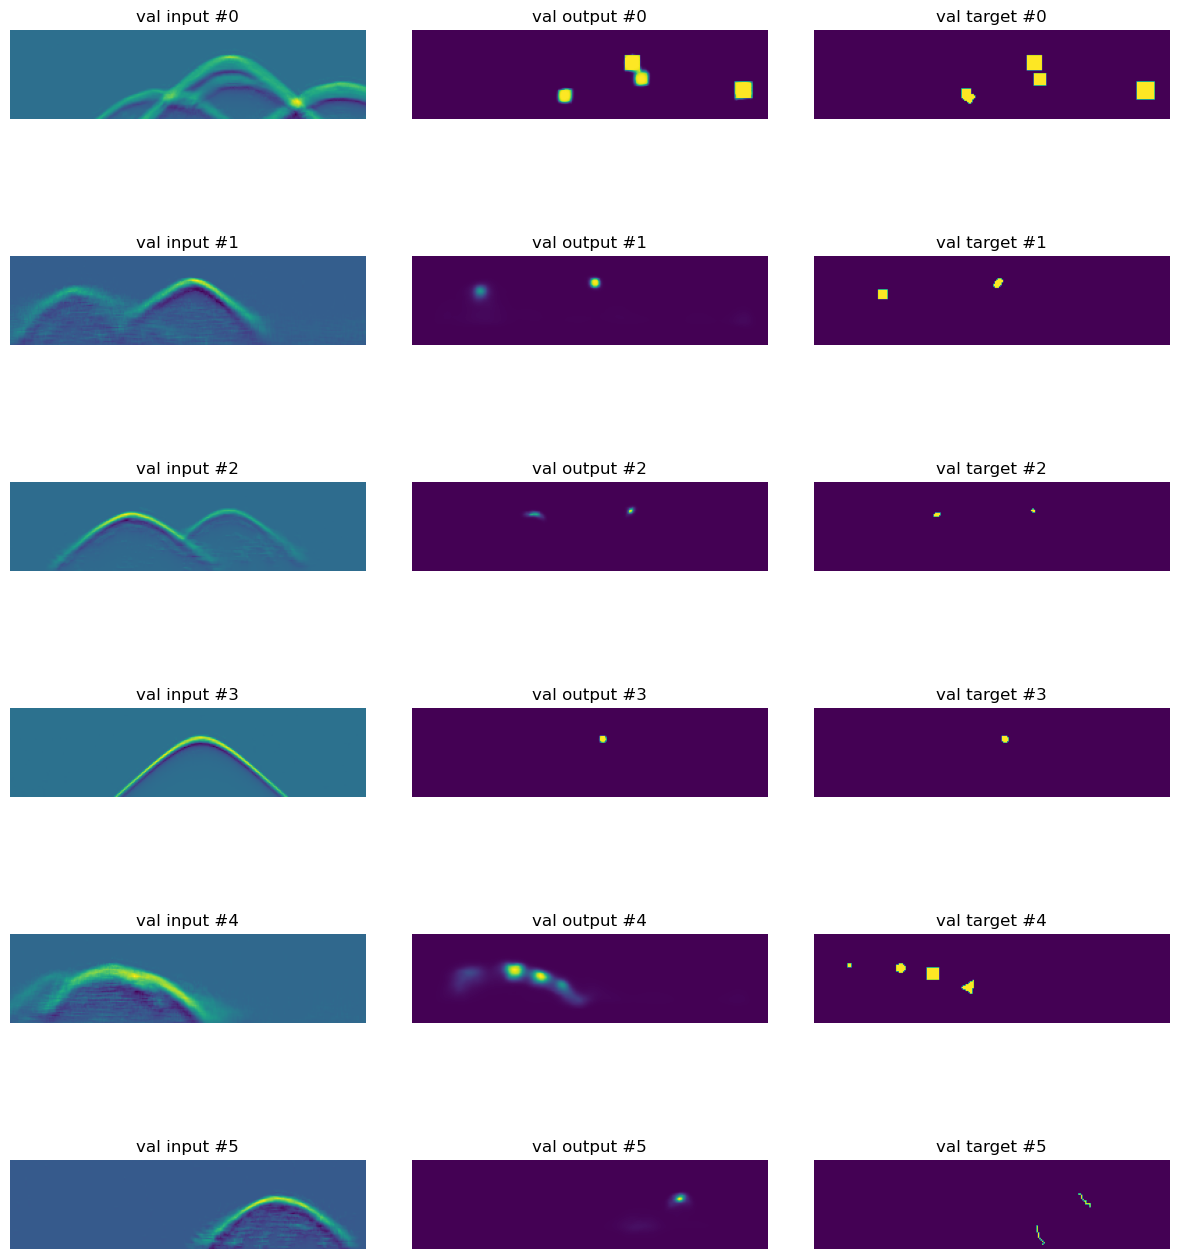

======================= epoch 20==========================
train loss: 0.008267796262225601
val loss: 0.009118952065706253
best val loss so far: 0.00898781452490948 (epoch 12)
======================= epoch 21==========================
train loss: 0.008218505245662528
val loss: 0.008982750420225784
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 22==========================
train loss: 0.00820816869896953
val loss: 0.009102572887204587
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 23==========================
train loss: 0.00816714595502708
val loss: 0.009123219741741195
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 24==========================
train loss: 0.008137459562669392
val loss: 0.008998897306853906
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  25


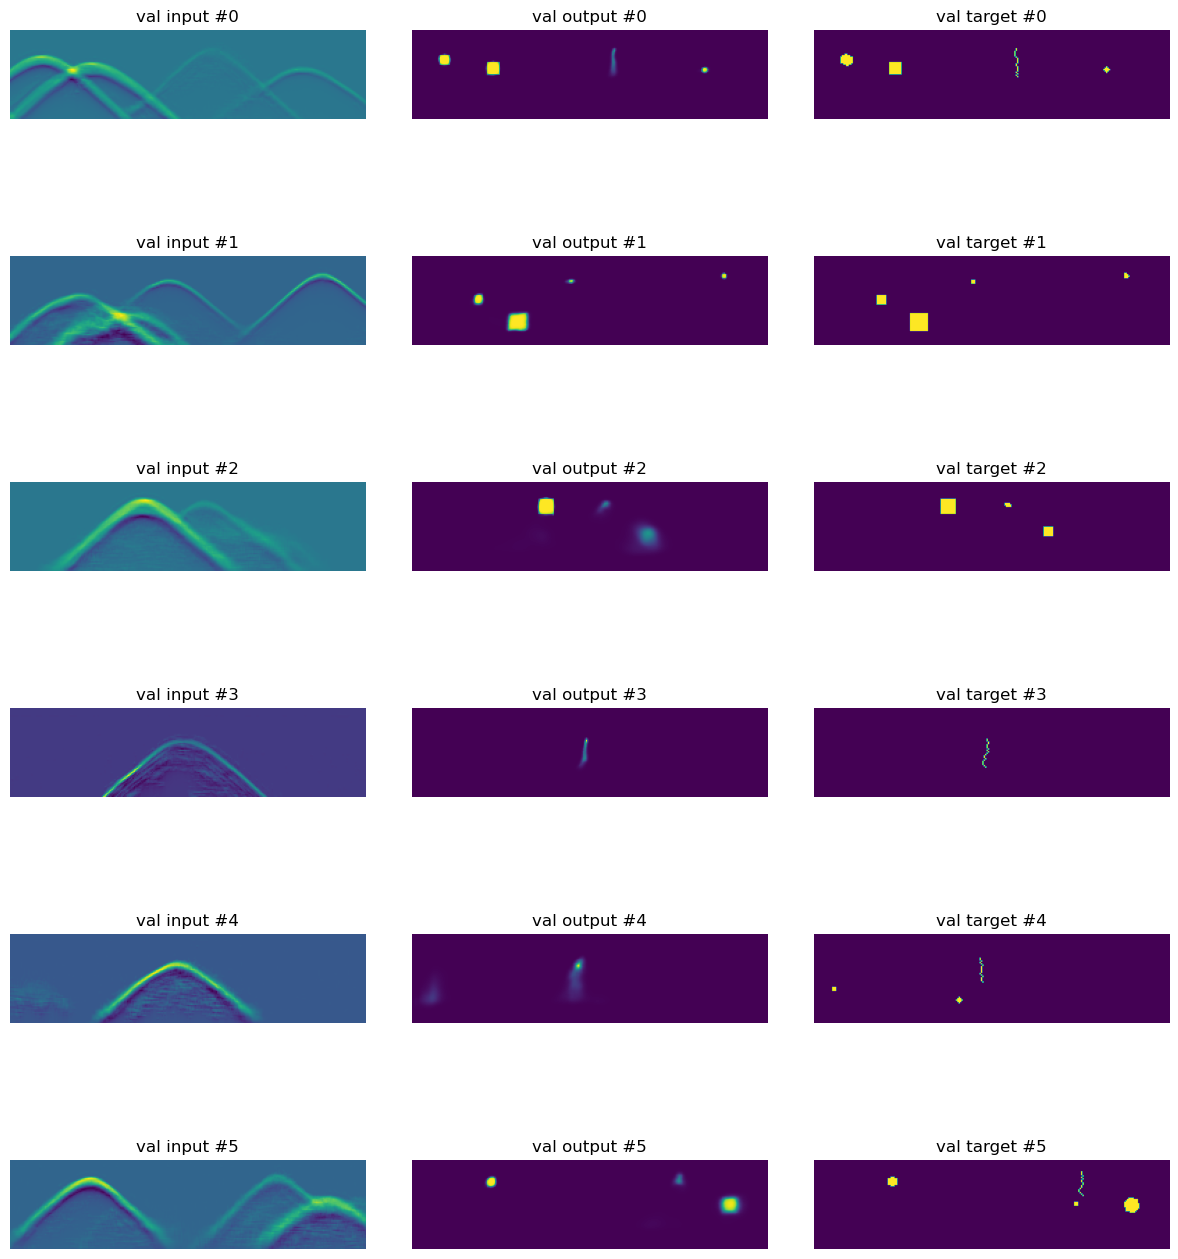

======================= epoch 25==========================
train loss: 0.008109726609531208
val loss: 0.009131673003546894
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 26==========================
train loss: 0.008071578846400371
val loss: 0.009138016724027693
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 27==========================
train loss: 0.008052517230986269
val loss: 0.009134152078884654
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 28==========================
train loss: 0.008021619307284709
val loss: 0.009041058643721045
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 29==========================
train loss: 0.008148798616763087
val loss: 0.009127413524547592
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  30


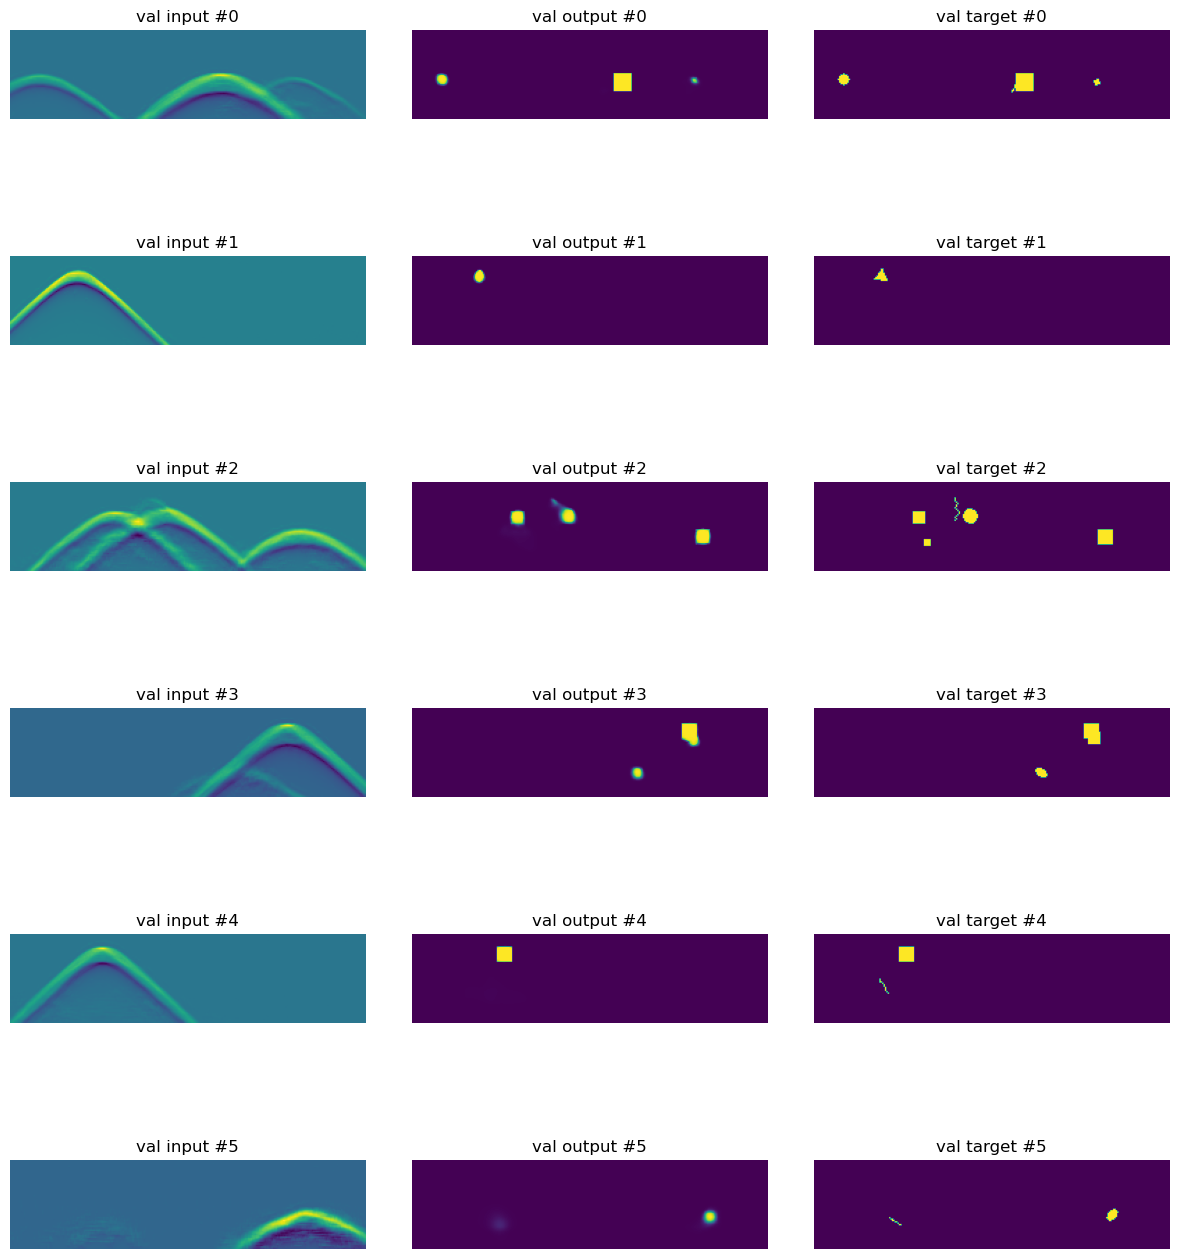

======================= epoch 30==========================
train loss: 0.007950172885568462
val loss: 0.009166403733892367
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 31==========================
train loss: 0.007883769018691965
val loss: 0.009107802660320885
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 32==========================
train loss: 0.007837919339814106
val loss: 0.009042366720736026
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 33==========================
train loss: 0.007810674952896079
val loss: 0.009030001024948433
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 34==========================
train loss: 0.007759724355026264
val loss: 0.009039318422437645
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  35


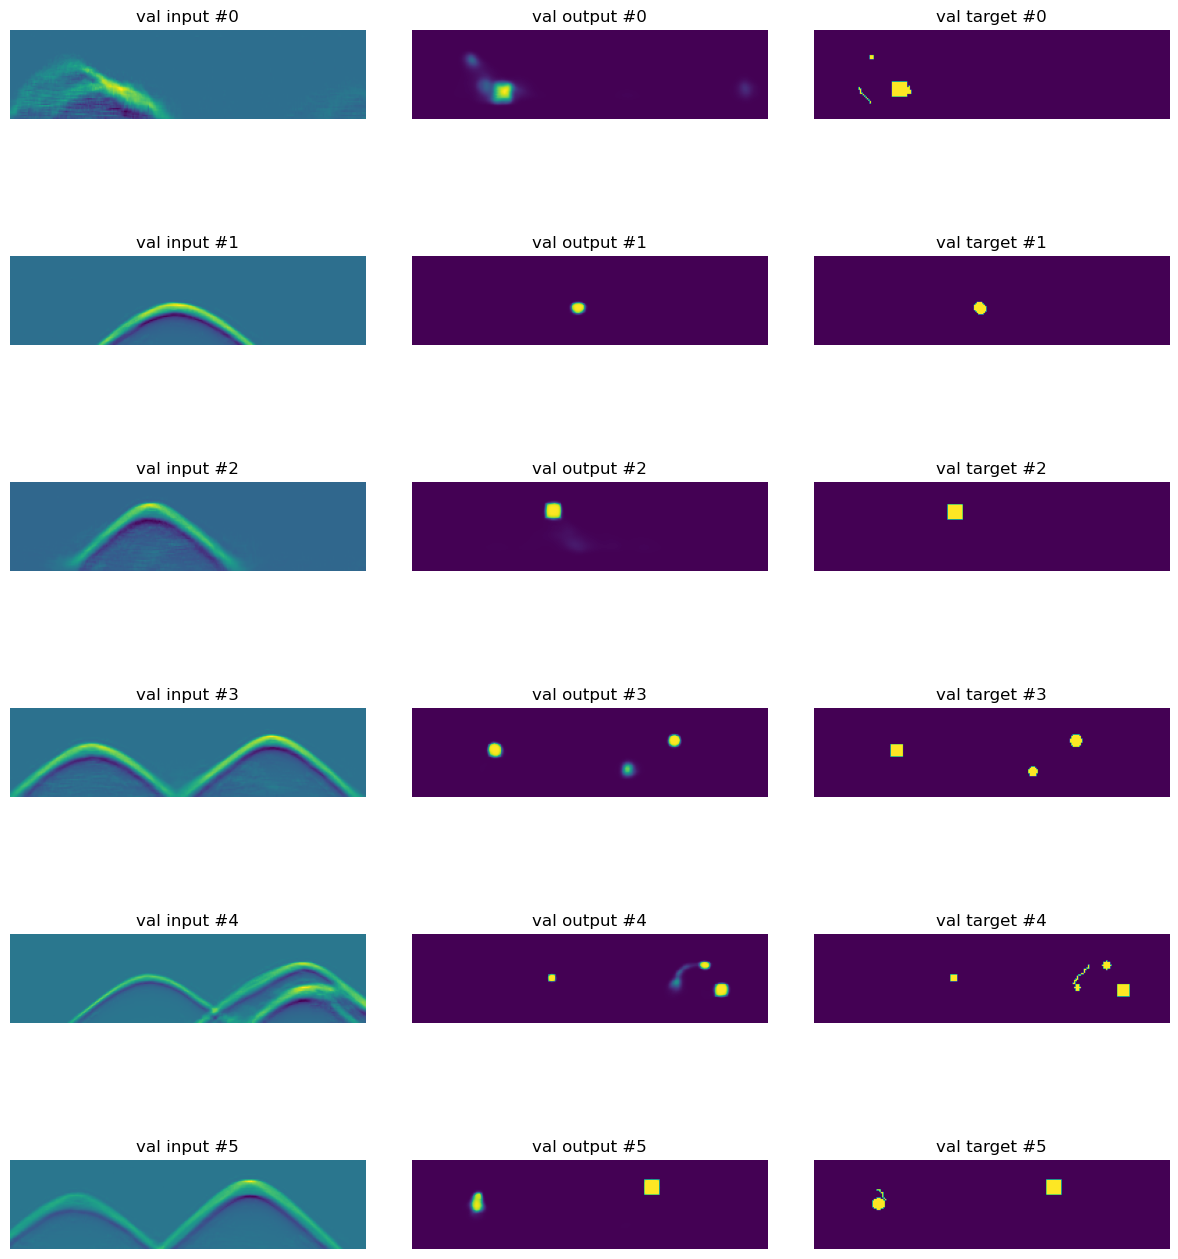

======================= epoch 35==========================
train loss: 0.007737374273419846
val loss: 0.009097685376880691
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 36==========================
train loss: 0.007704083806078415
val loss: 0.009102718889946118
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 37==========================
train loss: 0.007674692318323651
val loss: 0.009147603315301239
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 38==========================
train loss: 0.0076425985387468245
val loss: 0.009151622583391144
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 39==========================
train loss: 0.007627886342306738
val loss: 0.009156832901062444
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  40


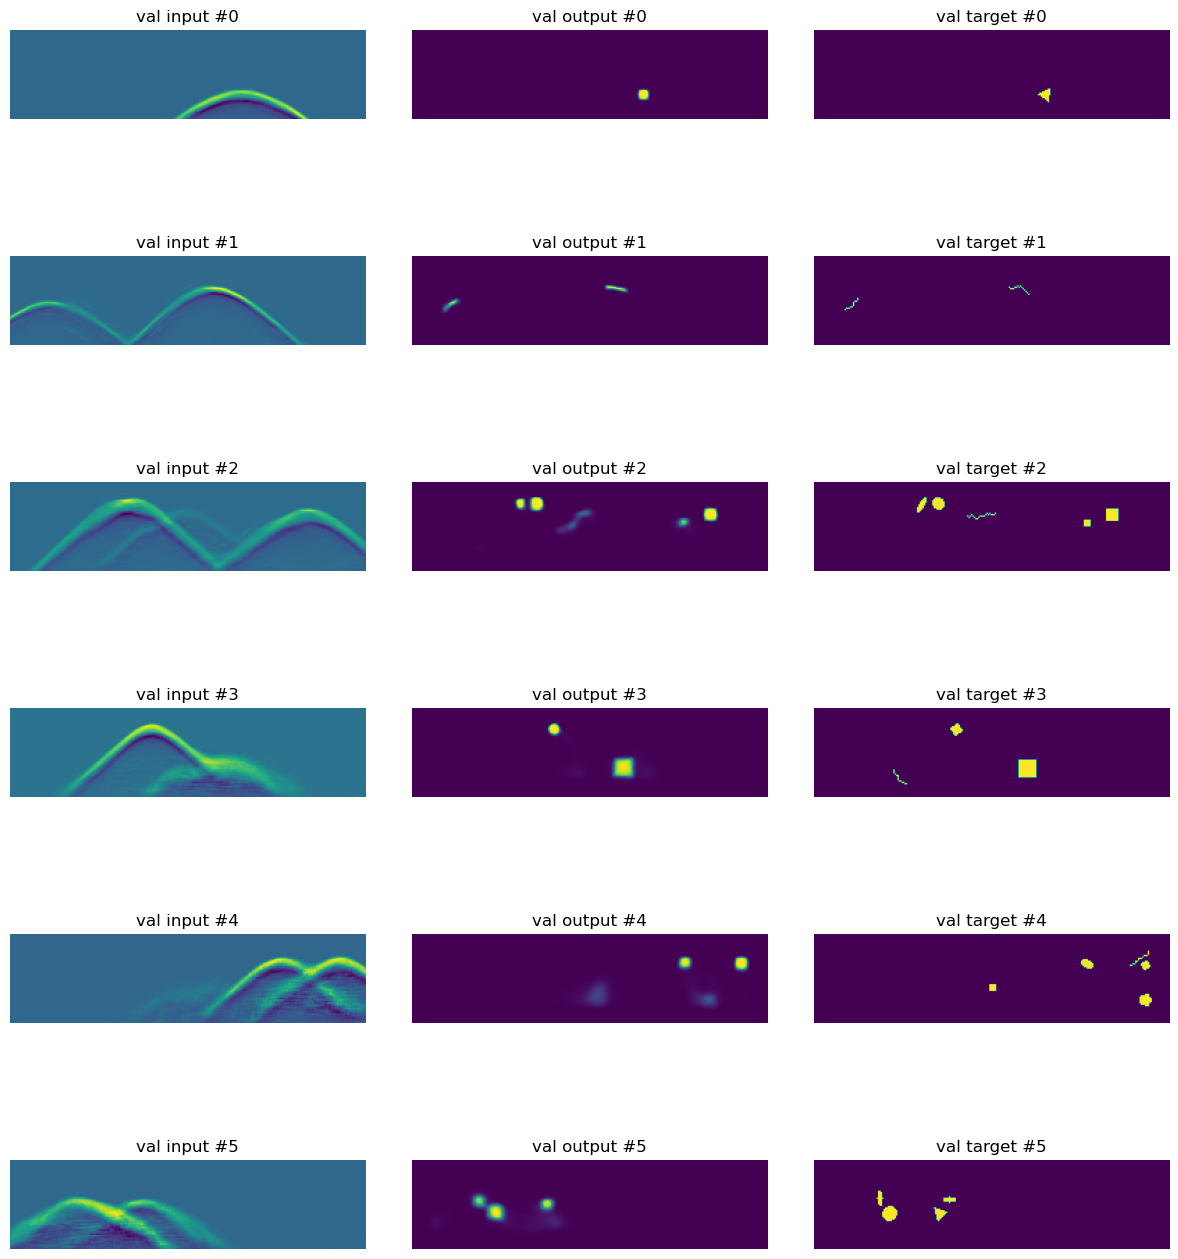

======================= epoch 40==========================
train loss: 0.007587738011046894
val loss: 0.009278893072274514
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 41==========================
train loss: 0.0075537479889608225
val loss: 0.0091914783178363
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 42==========================
train loss: 0.007534117843504646
val loss: 0.009439451726153493
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 43==========================
train loss: 0.007506692953073071
val loss: 0.009225300099235029
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 44==========================
train loss: 0.007481453231681371
val loss: 0.009288289836025797
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  45


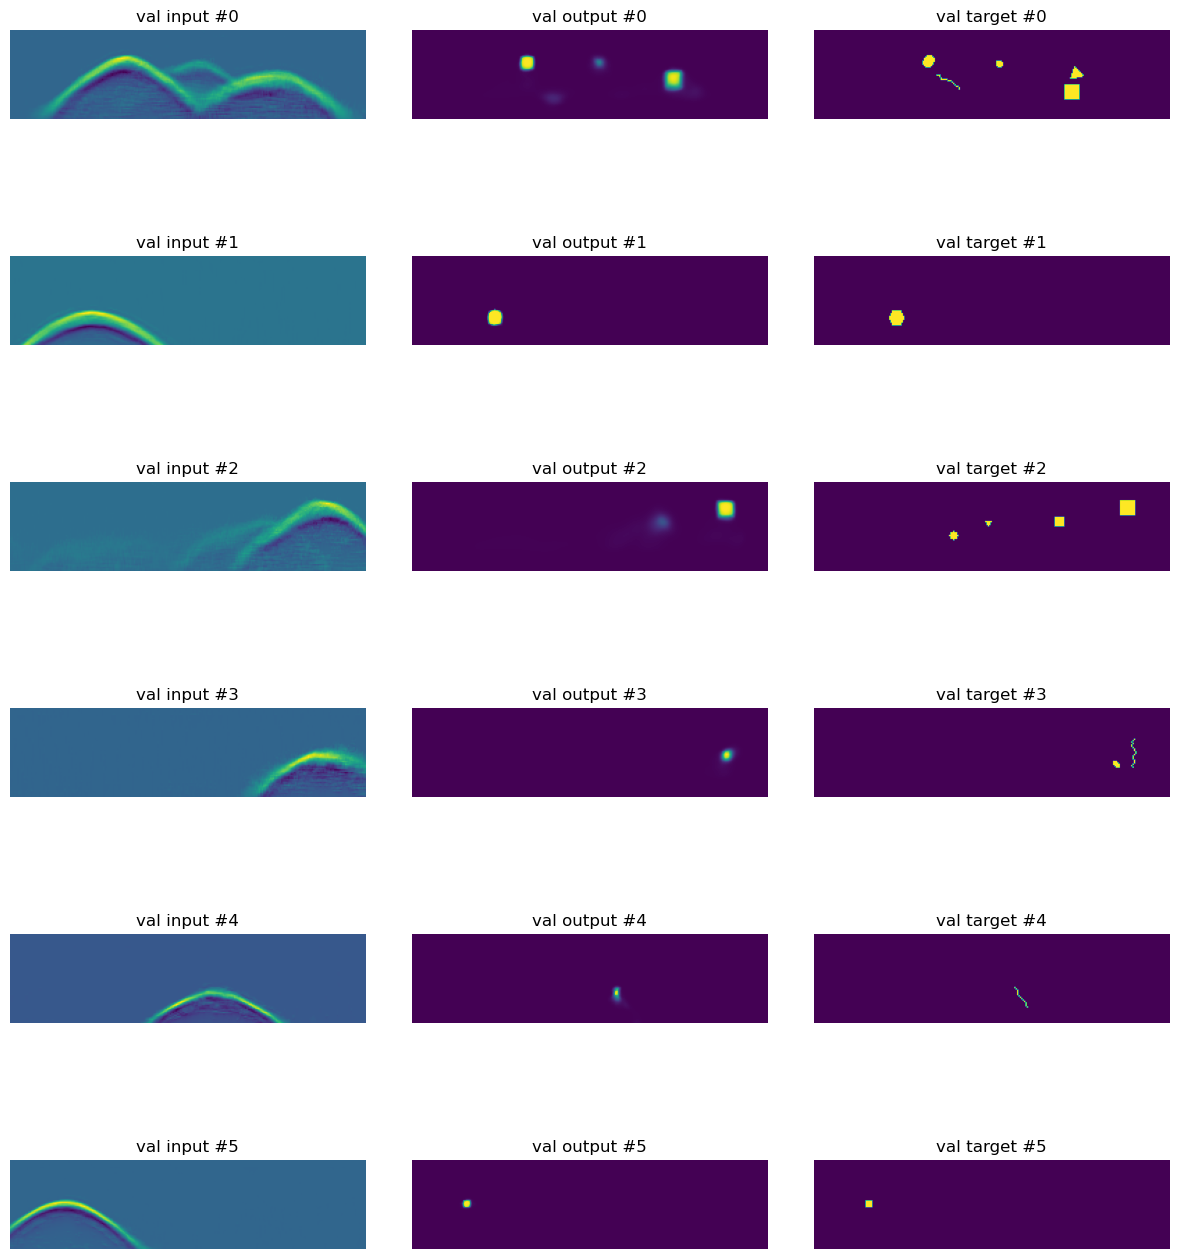

======================= epoch 45==========================
train loss: 0.007445270115887979
val loss: 0.0092296549489256
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 46==========================
train loss: 0.0074165304134367034
val loss: 0.009610727362101898
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 47==========================
train loss: 0.007391284054159769
val loss: 0.009280358764342963
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 48==========================
train loss: 0.00737025726182037
val loss: 0.009391054054023698
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 49==========================
train loss: 0.007341646301181754
val loss: 0.009554796100128443
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  50


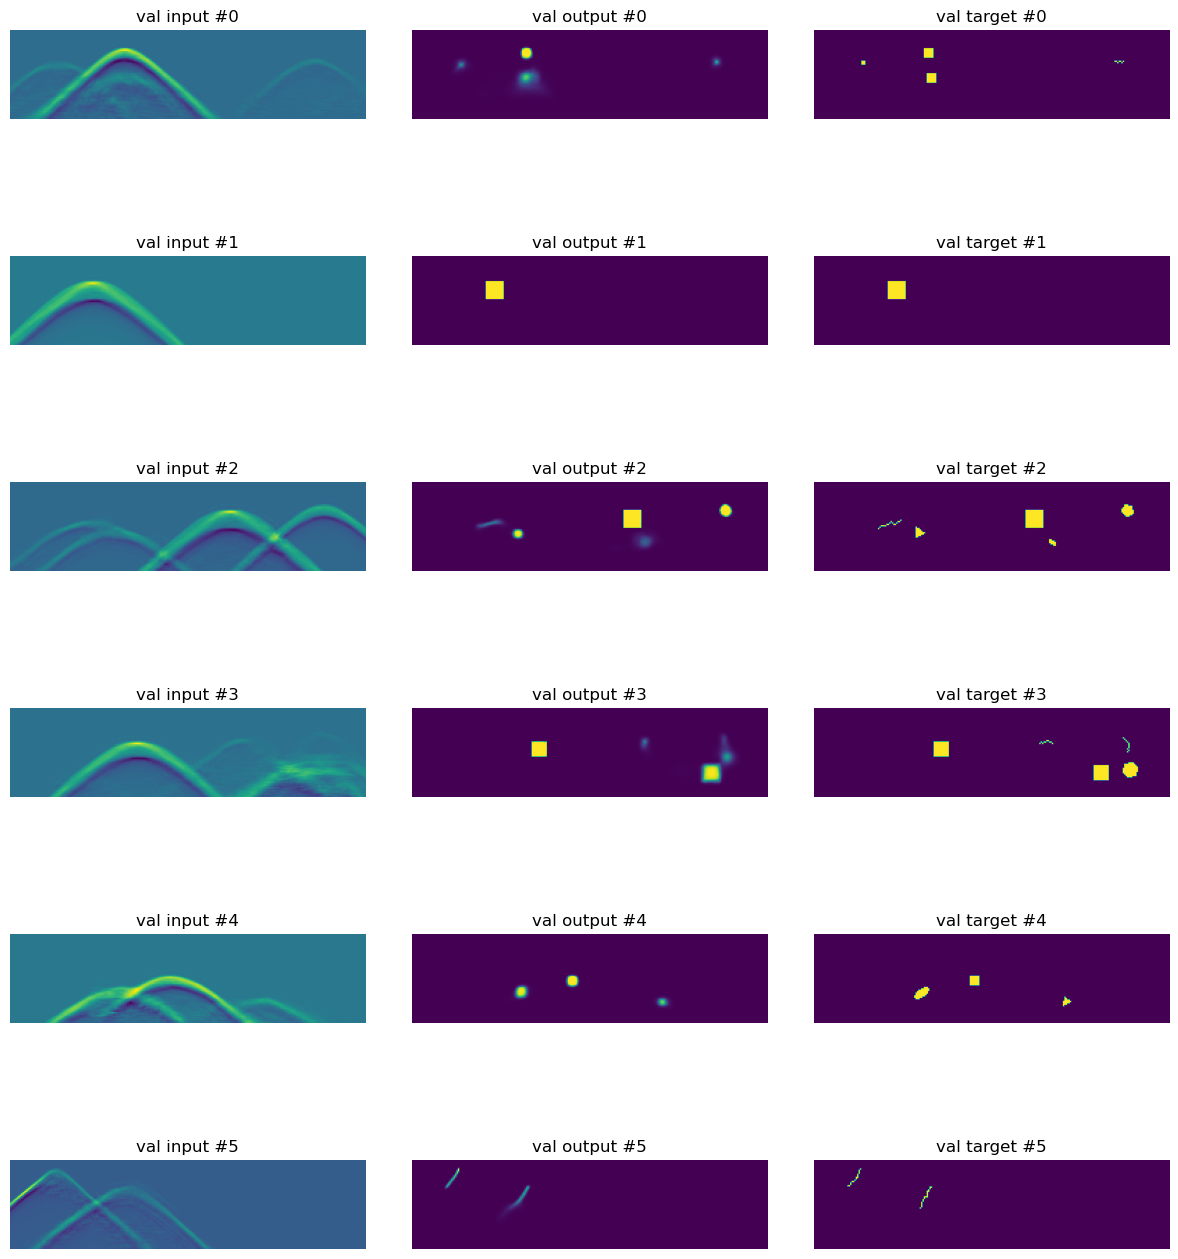

======================= epoch 50==========================
train loss: 0.007309457961440785
val loss: 0.009307640679646283
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 51==========================
train loss: 0.007283710635252646
val loss: 0.009571069645928219
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 52==========================
train loss: 0.007271694650640711
val loss: 0.00954055777285248
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 53==========================
train loss: 0.007209297618435812
val loss: 0.009432468857616186
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 54==========================
train loss: 0.0072133535485627365
val loss: 0.009399944435339421
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  55


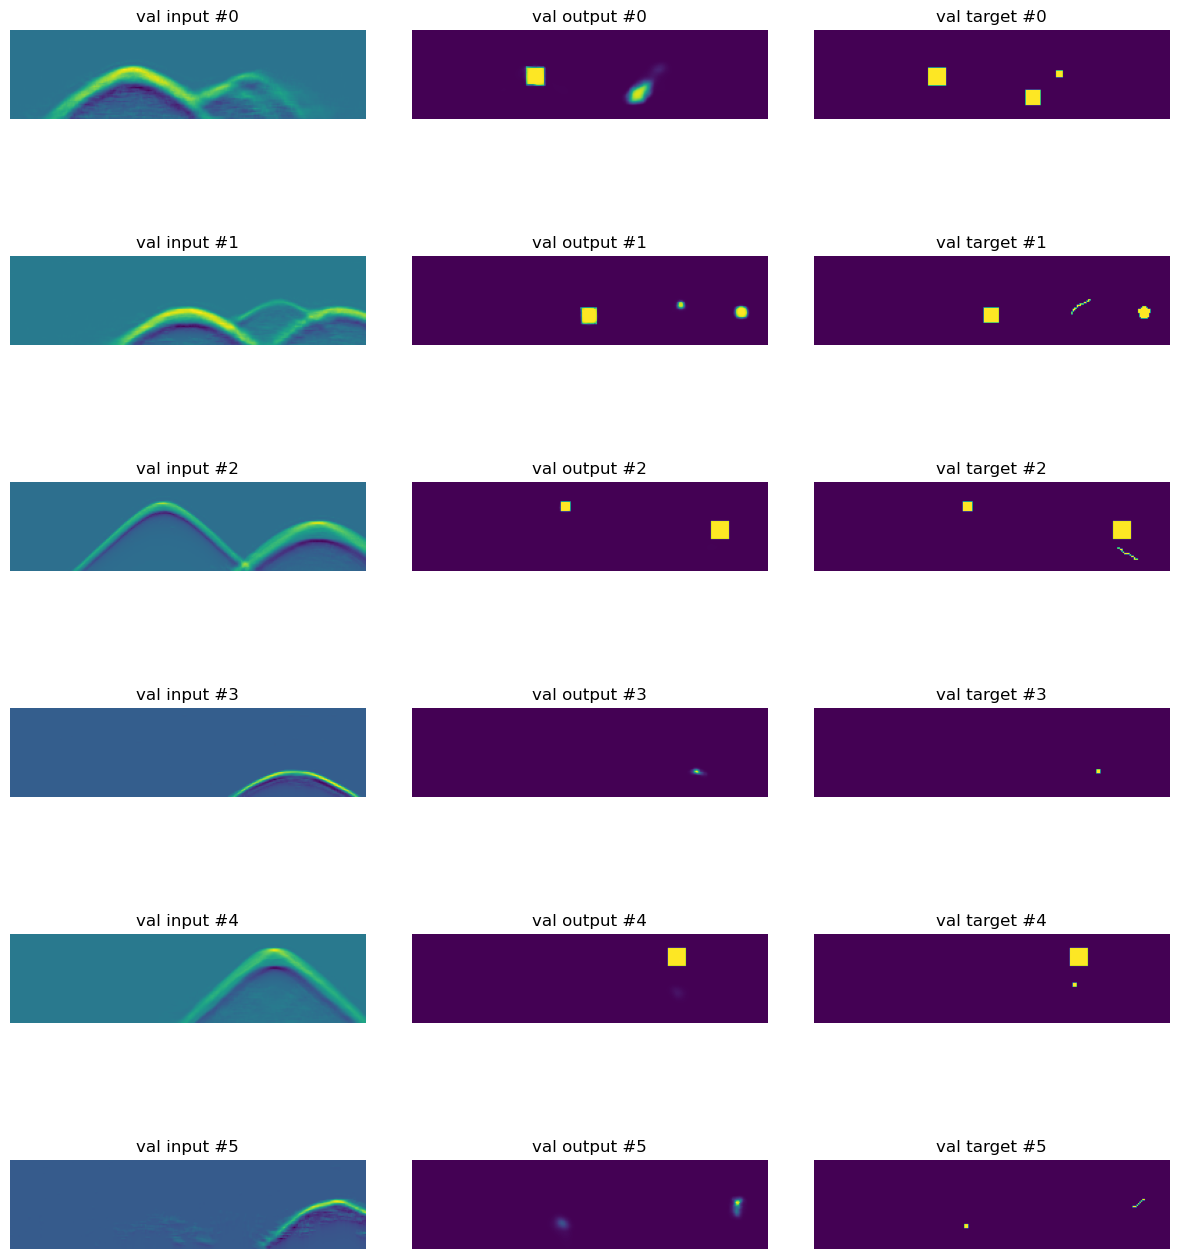

======================= epoch 55==========================
train loss: 0.0071736312148423164
val loss: 0.009491566168610006
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 56==========================
train loss: 0.007156414225755725
val loss: 0.00936211992346216
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 57==========================
train loss: 0.007121631722024176
val loss: 0.009615109240519814
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 58==========================
train loss: 0.007094300526165171
val loss: 0.009550145212444476
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 59==========================
train loss: 0.0070727838565653655
val loss: 0.00949753269890789
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  60


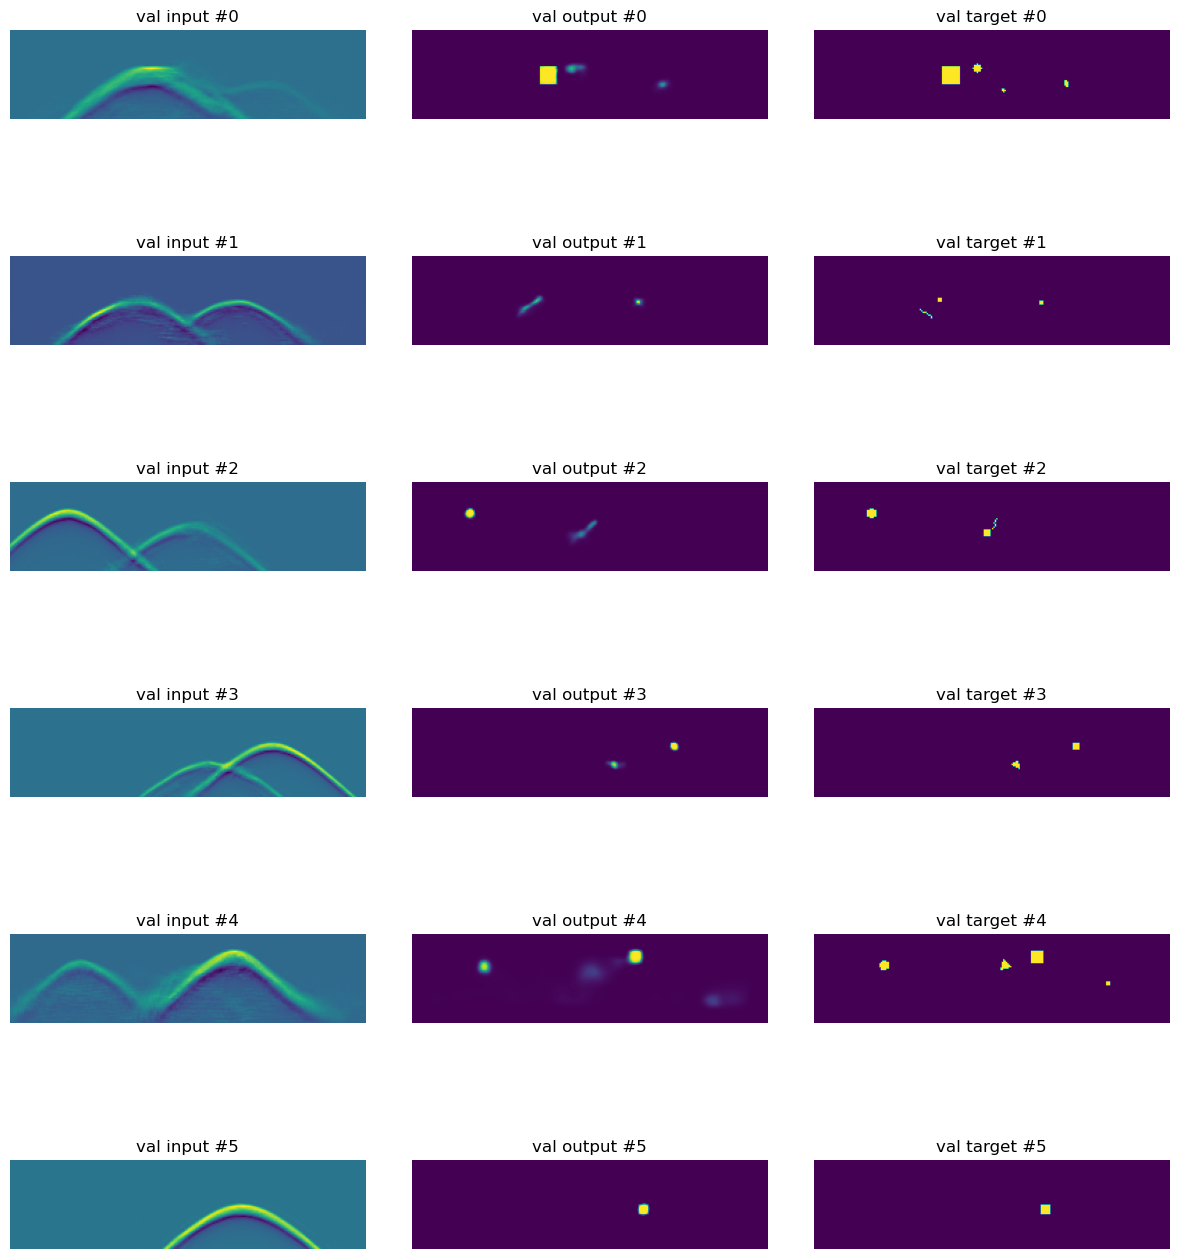

======================= epoch 60==========================
train loss: 0.007052402471817914
val loss: 0.009465473512886092
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 61==========================
train loss: 0.0070085902702558085
val loss: 0.009500114326830953
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 62==========================
train loss: 0.0069971074016357306
val loss: 0.009436585692455993
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 63==========================
train loss: 0.006976386346796062
val loss: 0.009767719818279147
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 64==========================
train loss: 0.006960618649667595
val loss: 0.009502550937701016
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  65


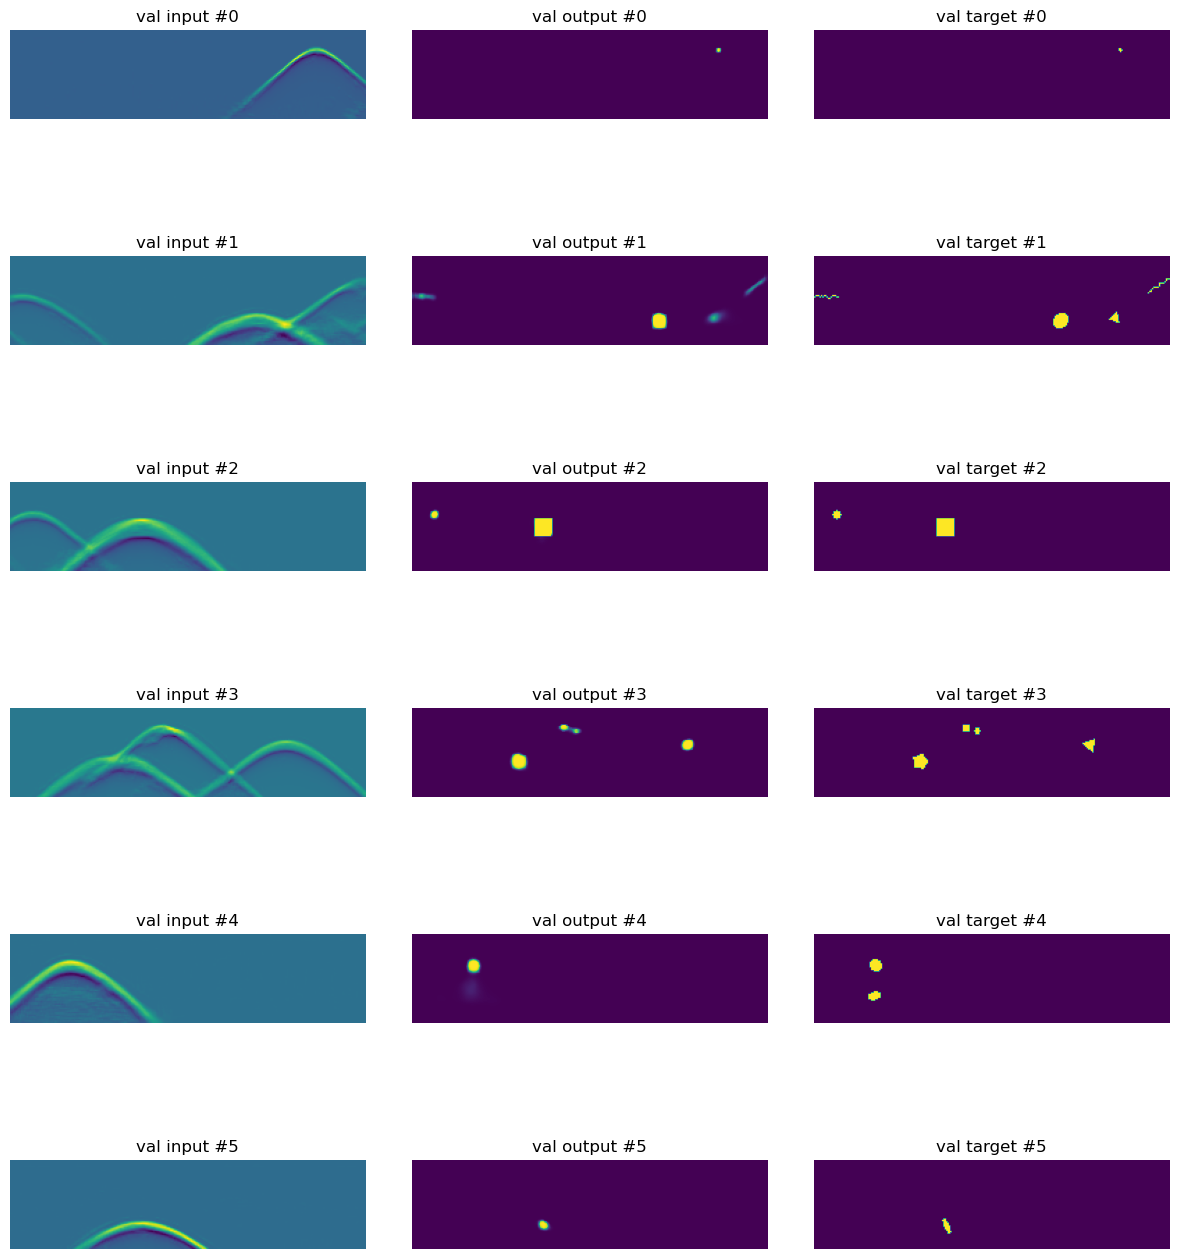

======================= epoch 65==========================
train loss: 0.00693005364567216
val loss: 0.0097249129449483
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 66==========================
train loss: 0.006891728371309
val loss: 0.009771906102309004
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 67==========================
train loss: 0.006865438055043341
val loss: 0.009608629799680784
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 68==========================
train loss: 0.006816626153478864
val loss: 0.010053596925921738
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 69==========================
train loss: 0.006804734700548579
val loss: 0.009550142039079218
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  70


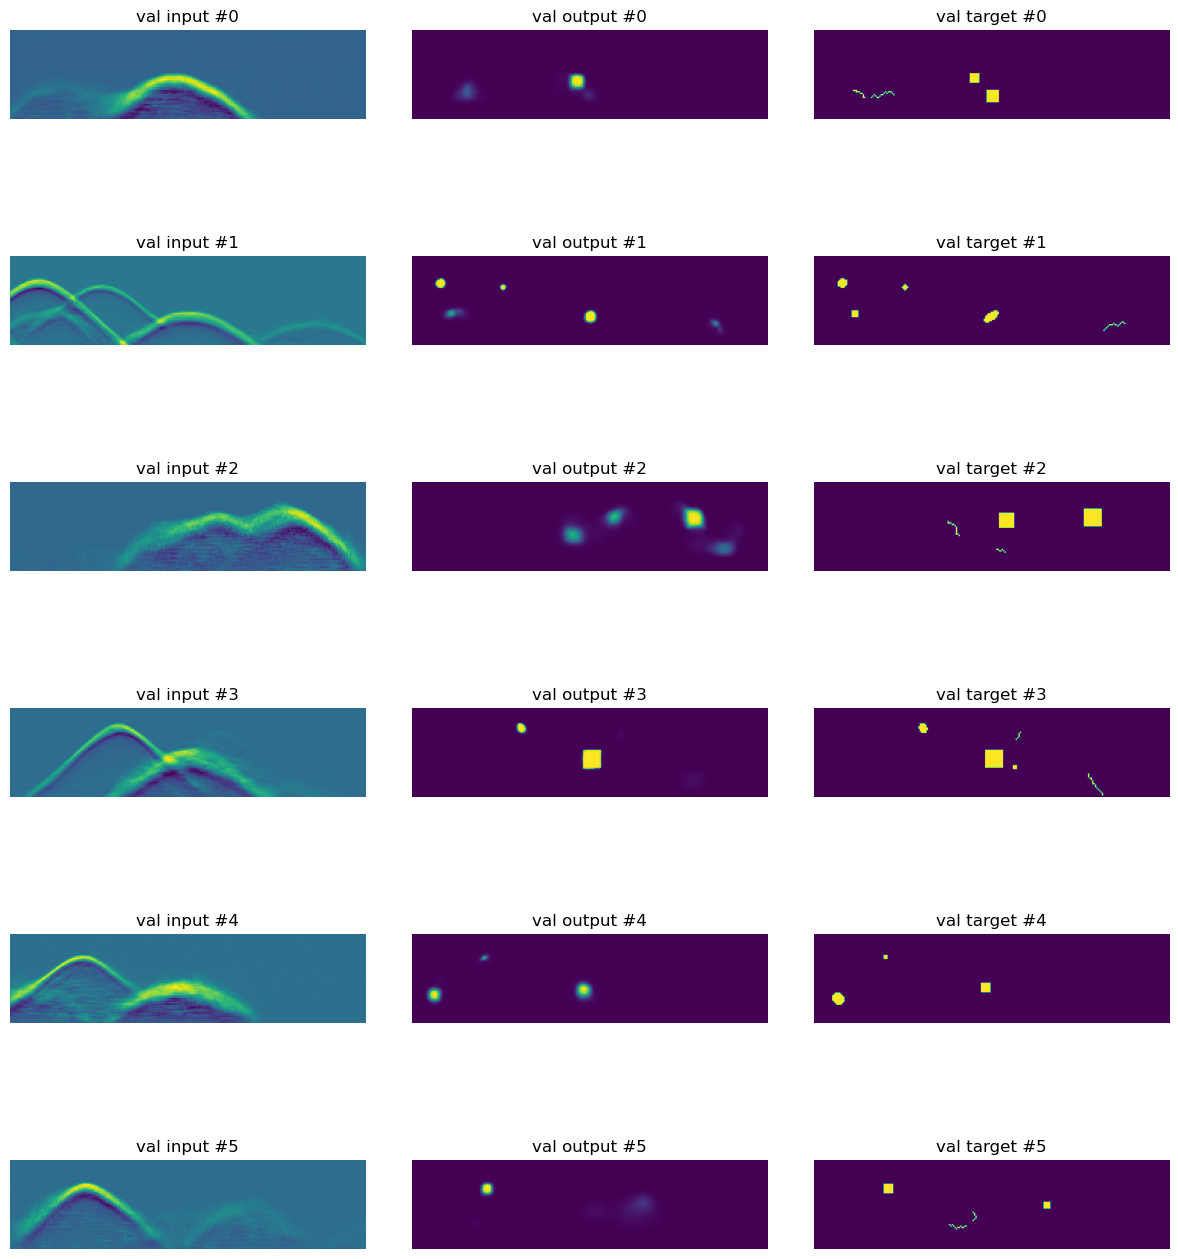

======================= epoch 70==========================
train loss: 0.0067813059848413106
val loss: 0.00956918491749093
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 71==========================
train loss: 0.006765906730317511
val loss: 0.009666041912278161
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 72==========================
train loss: 0.0067312423332914475
val loss: 0.009961731159128248
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 73==========================
train loss: 0.006705606482224539
val loss: 0.010031155156670139
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 74==========================
train loss: 0.00670290489832405
val loss: 0.009943299849983305
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  75


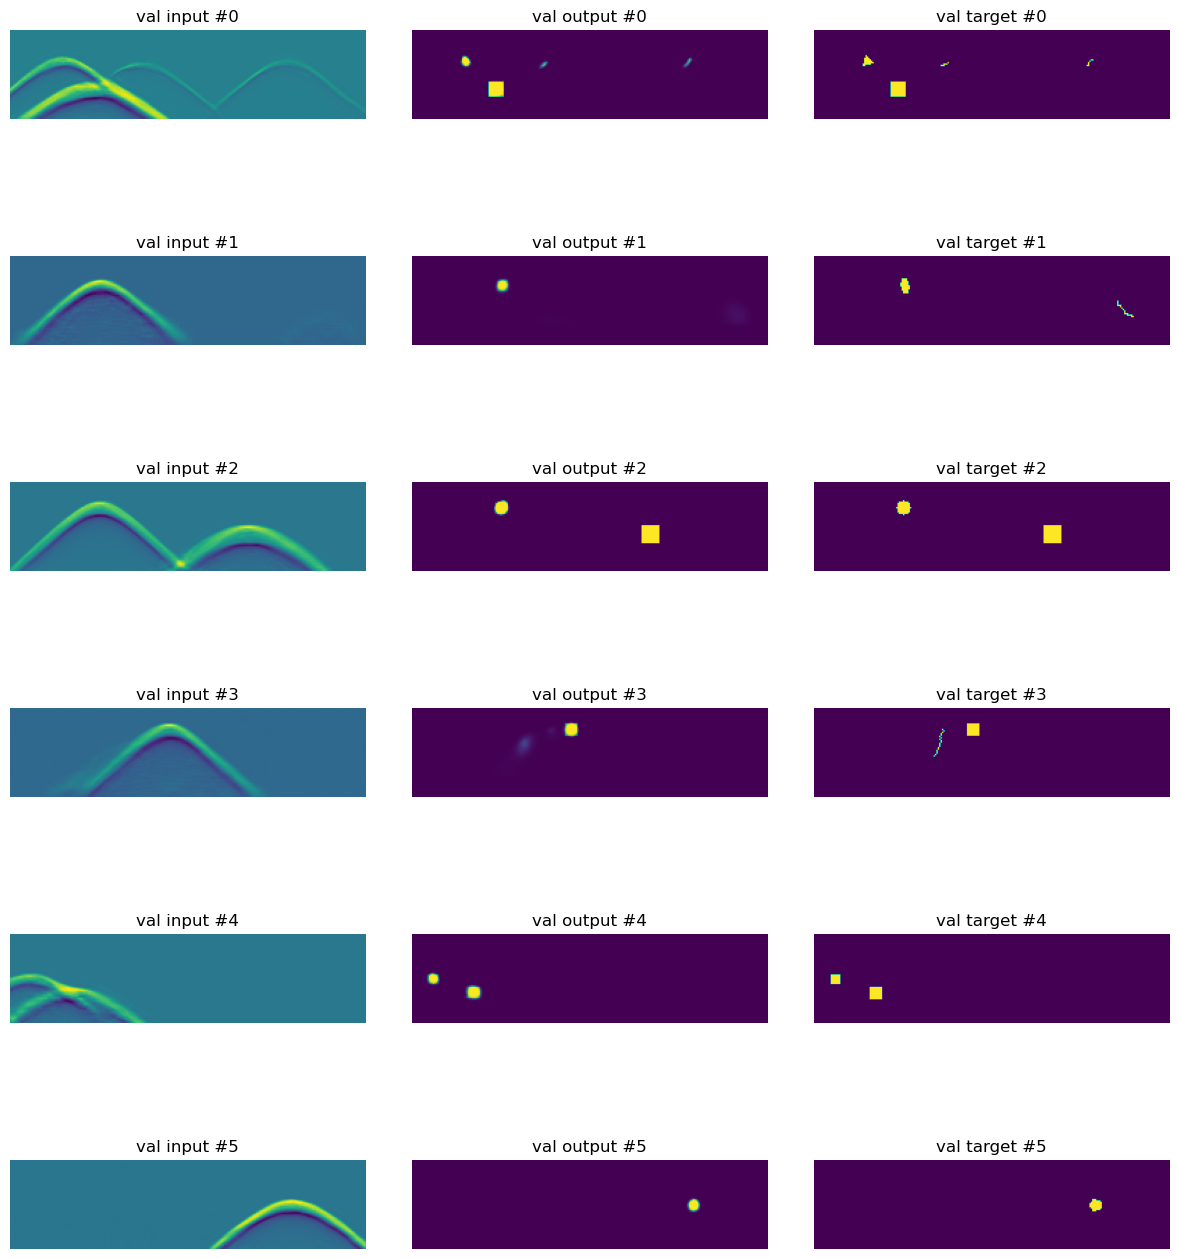

======================= epoch 75==========================
train loss: 0.006670858468001825
val loss: 0.009875018522841856
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 76==========================
train loss: 0.006662888920342084
val loss: 0.01029440487595275
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 77==========================
train loss: 0.006636152713748743
val loss: 0.009794164745253511
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 78==========================
train loss: 0.00660582797335519
val loss: 0.009742783541325479
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 79==========================
train loss: 0.006564428987301653
val loss: 0.010074145164573564
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  80


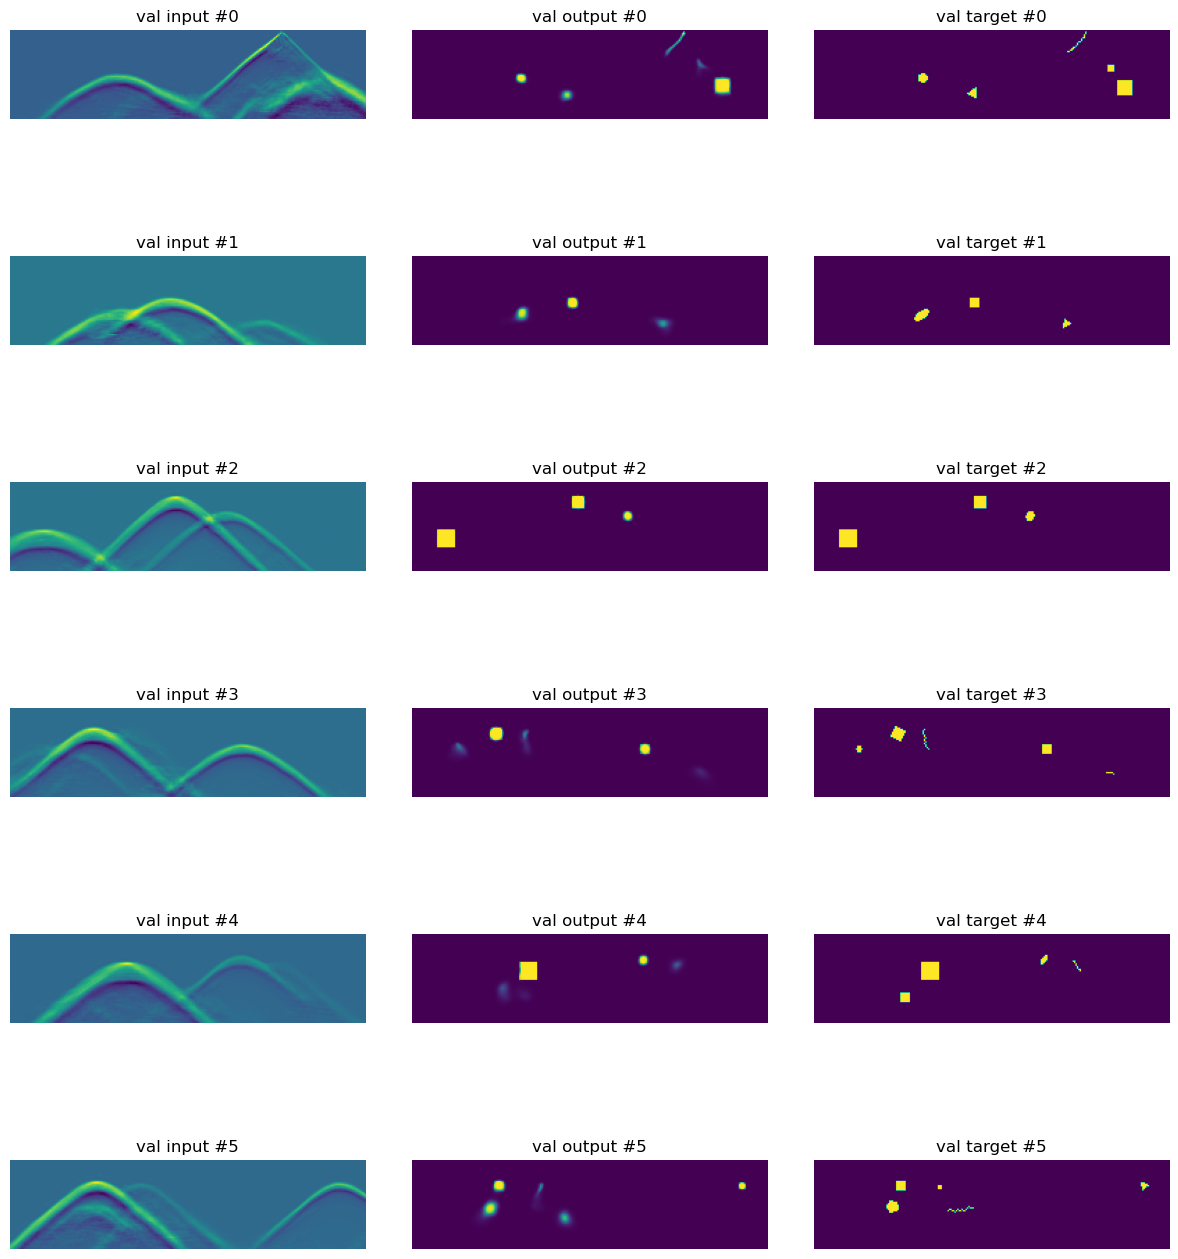

======================= epoch 80==========================
train loss: 0.006549014060205081
val loss: 0.009999343293718994
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 81==========================
train loss: 0.006536498708359432
val loss: 0.01008942874497734
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 82==========================
train loss: 0.0065071161274681795
val loss: 0.010021663846215233
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 83==========================
train loss: 0.006492033013928449
val loss: 0.00972983867279254
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 84==========================
train loss: 0.006466527817130555
val loss: 0.009797295552445576
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  85


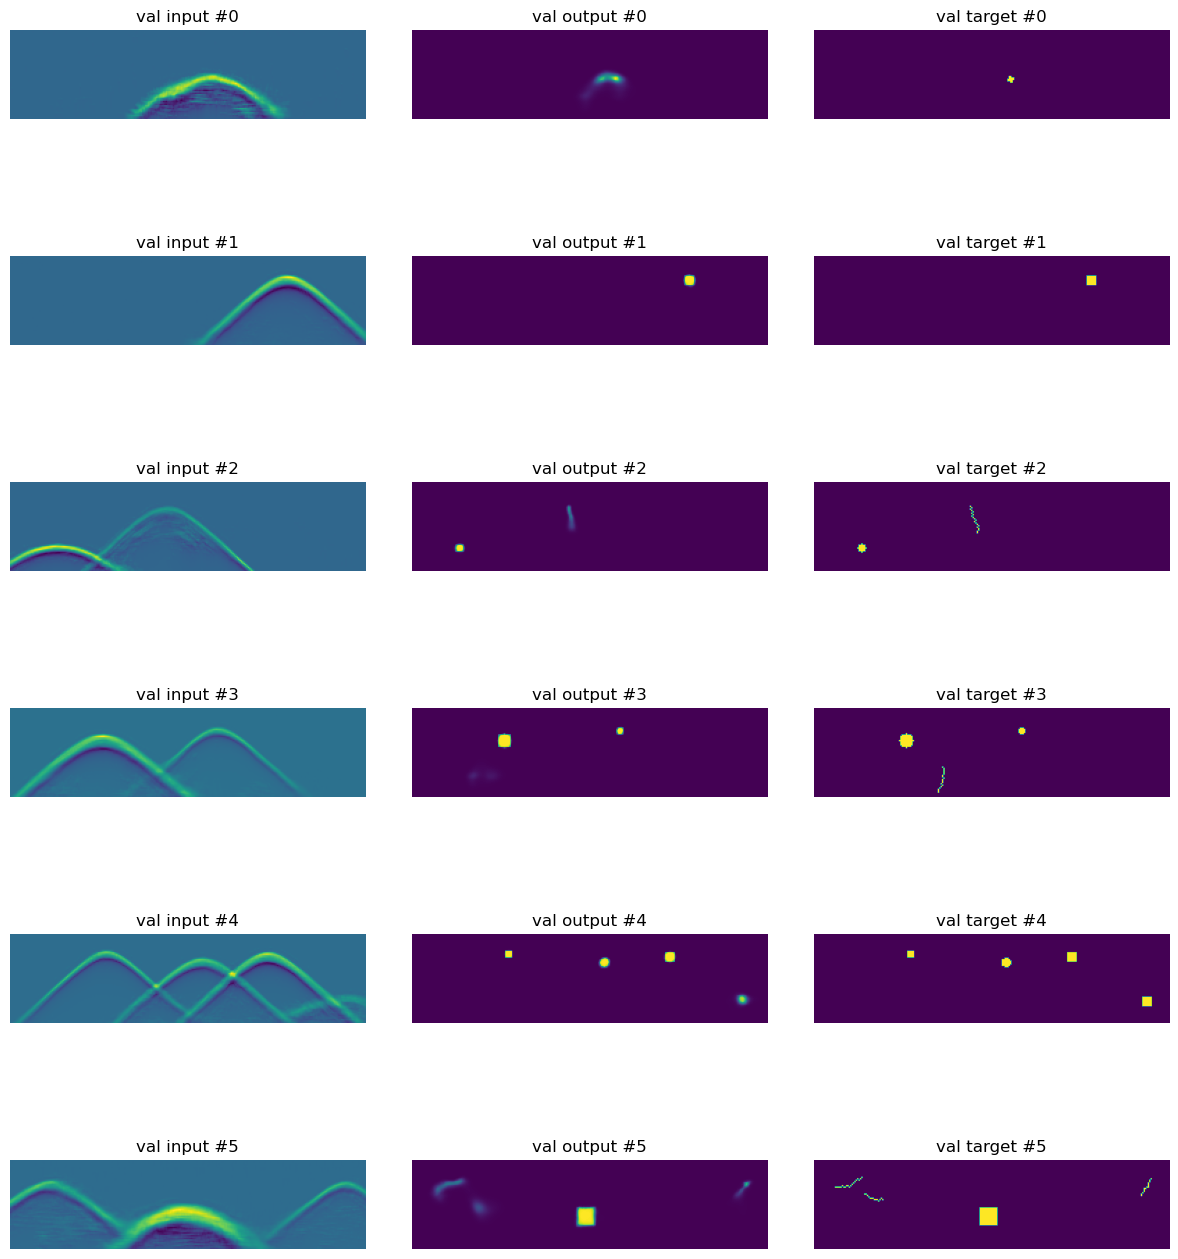

======================= epoch 85==========================
train loss: 0.006445990031483234
val loss: 0.010122714845696464
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 86==========================
train loss: 0.006422010568800033
val loss: 0.010014303222182207
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 87==========================
train loss: 0.0063927879454713545
val loss: 0.010115274128154852
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 88==========================
train loss: 0.006382425600066199
val loss: 0.010274447326315567
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 89==========================
train loss: 0.0063539131052239095
val loss: 0.010304363124887458
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  90


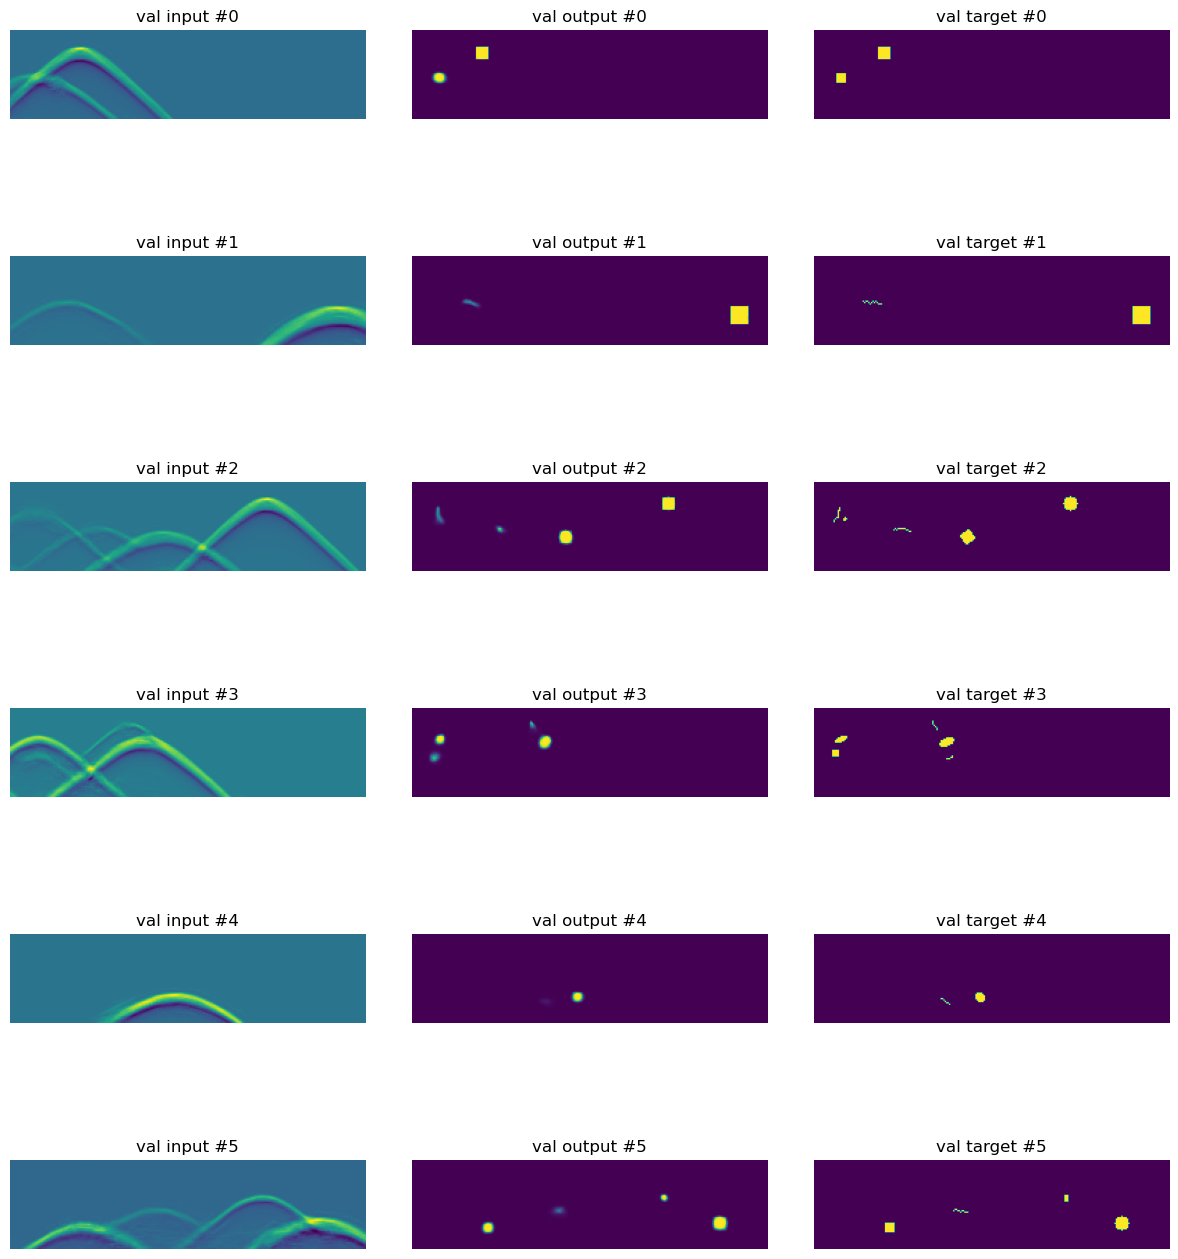

======================= epoch 90==========================
train loss: 0.006333159845409682
val loss: 0.010053040702361614
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 91==========================
train loss: 0.0063248463517520575
val loss: 0.010330316358129494
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 92==========================
train loss: 0.006288095437121229
val loss: 0.010664524023188278
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 93==========================
train loss: 0.006271213447675109
val loss: 0.010448513427516445
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 94==========================
train loss: 0.00625447804488067
val loss: 0.010412444039713592
best val loss so far: 0.008982750420225784 (epoch 21)
epoch  95


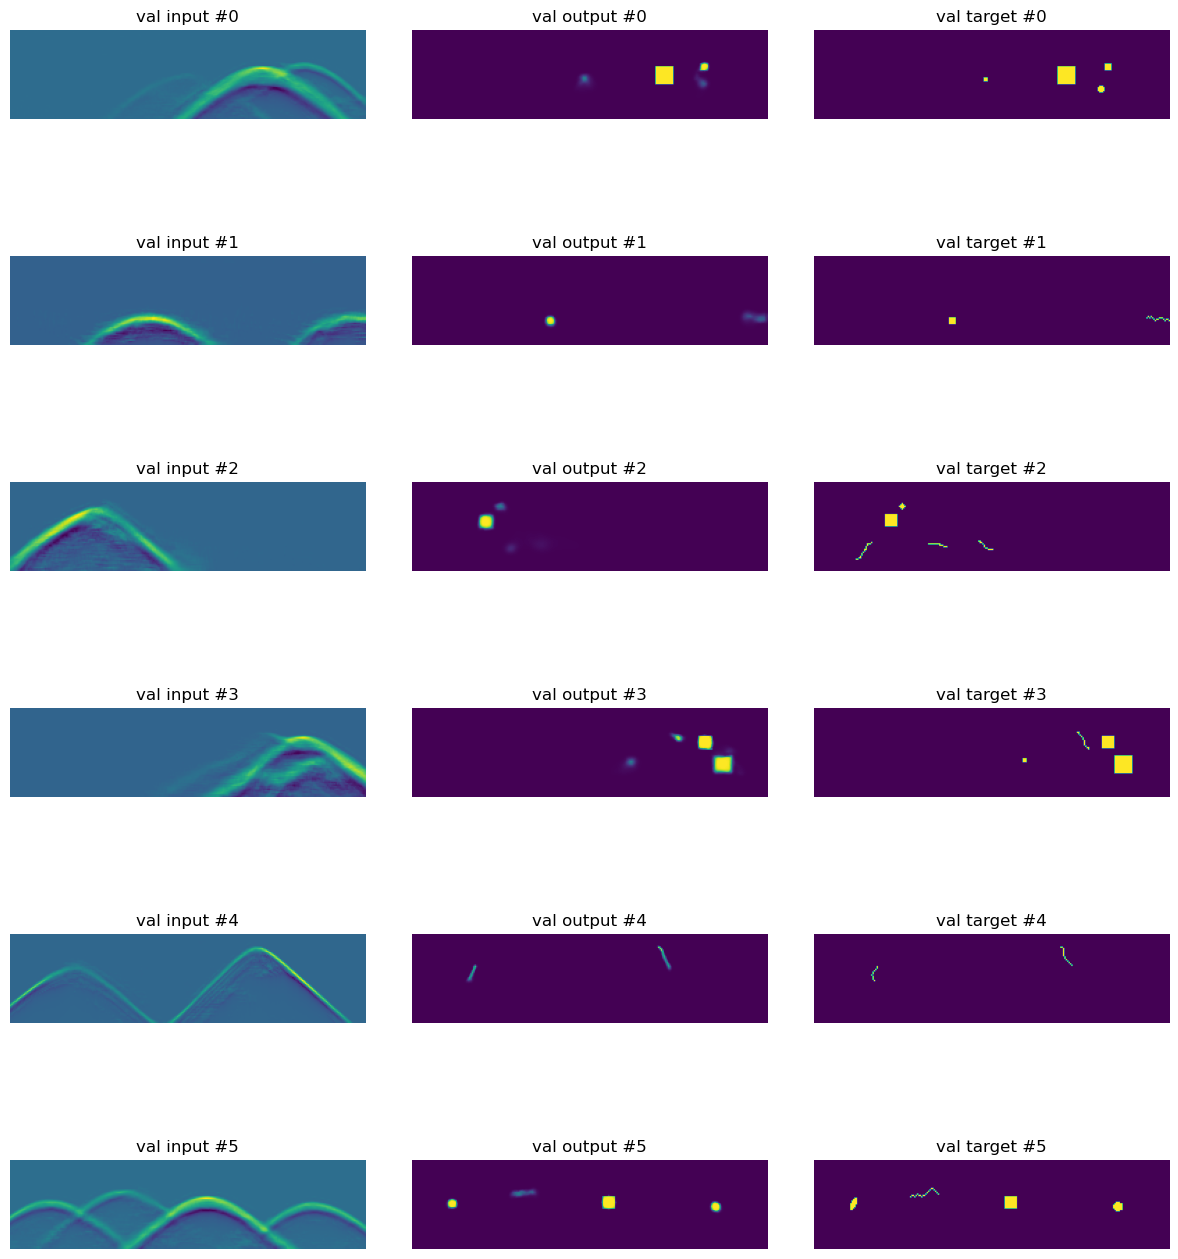

======================= epoch 95==========================
train loss: 0.0062293626058090015
val loss: 0.010221056129783392
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 96==========================
train loss: 0.006218306194350589
val loss: 0.01059625247423537
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 97==========================
train loss: 0.006193968828927609
val loss: 0.010346974589396268
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 98==========================
train loss: 0.006173386023408966
val loss: 0.010773367310641333
best val loss so far: 0.008982750420225784 (epoch 21)
======================= epoch 99==========================
train loss: 0.006160431772703305
val loss: 0.010544355984893627
best val loss so far: 0.008982750420225784 (epoch 21)
training finished...


In [18]:
epochs = 100
visualization_lvl = 1

train(model, train_dataset, val_dataset, epochs, visualization_lvl)

print("training finished...")  